# Numerical Methods in Scientific Computing
# Assignment 5
## E Naveen
## (ME16B077)

# Q1.

Equioscillation theorem
Let $f \in C[−1, 1]$ and $p(x)$ be a polynomial whose degree doesn’t exceed n. p minimizes $||f − p||_{\infty}$
iff $f − p$ equioscillates at $n + 2$ points.

p is the $minimax$  $approximation$ to f as the infinity norm tries to minimze the maximum error.

This theorem can be proved by showing the assumption that p is not the minimax approximation cannot be true given $f − p$ equioscillates at $n + 2$ points.(reductio ad absurdum)

Let $f − p$ equioscillates at $n + 2$ points and if $p$ is not the minimax approximation then there must be some polynomial $q \in P_n$ such that $p+q \in P_n$ is the minimax approximation. Since the curve $f-p-q$ must have smaller infinity norm, adding $q$ to $p$ reduces the size of the modulus of error function $f − p$ on all $n + 2$ equioscillation points.

In particular, this must mean that $q$ alternates in sign on these $n + 2$ points, and thus must have at least $n + 1$ zeros. Since $q \in P_n$, this is impossible, contradicting our initial assumption that $p$ is not the minimax approximation. Hence p is the minimax approximation to f which is same as p minimizes $||f − p||_{\infty}$.

To prove the uniqueness of p, let p is best approximation with equioscillation points $x_0, x_1, ..., x_{n+1}$ and $x_0< x_1< ...< x_{n+1}$. Suppose $||f − q||_{\infty} \leq ||f − p||_{\infty}$ for some $q \in P_n$. Then $p-q$ must be $\leq 0$ at $x_0, x_2, ...$ and $\geq 0$ at $x_1, x_3, ...$. Which implies p-q has atleast n+1 roots in total which is not possible for a poynomial $\in P_n$ unless p=q. Hence p is unique.

# Q2.

Let $E = |x| - x^2 - 1/8$. To find maximum modulus values of $E$ we can differentiate and equate to $0$ in two separate intervals [-1,0) and (0,1].

\begin{equation}
    1-2x=0 \Rightarrow x=1/2 \quad ; \quad -1-2x=0 \Rightarrow x=-1/2
\end{equation}

\begin{equation}
    E(x=-1/2) = 1/8 \quad ; \quad E(x=1/2) = 1/8
\end{equation}

Taking into consideration the boundary values and at x=0,
\begin{equation}
    E(x=-1) = -1/8 \quad ; \quad E(x=0) = -1/8 \quad ; \quad E(x=1) = -1/8
\end{equation}
which are also the maximum modulus values. 

Therefore we can say that E equioscillates at $x=\pm1, \pm1/2, 0$. Hence, as $f-p$ equioscillates at $3+2$ points$(n=3)$, p is the unique polynomial of all polynomials whose degree doesn’t exceed 3 that minimizes $||f − p||_{\infty}$ and is the best approximation in infinity norm.


In [18]:
import numpy as np
import matplotlib.pyplot as plt

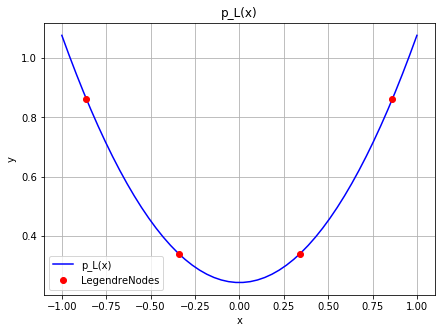

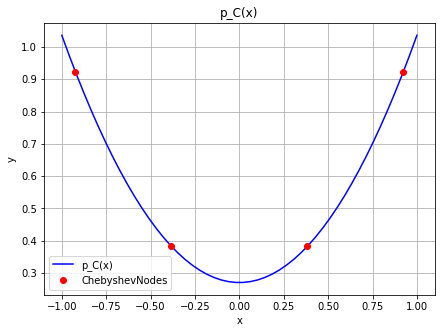

In [22]:
# Legendre Nodes
x_L = [-0.8611363115940525752239464888928095050957253796297176376157219209065294714950488657041623398844793052105769209319781763249637438391157919764084938458618855762872931327441369944290122598469710261906458681564745219362114916066097678053187180580268539141223471780870198639372247416951073770551,
       -0.3399810435848562648026657591032446872005758697709143525929539768210200304632370344778752804355548115489602395207464932135845003241712491992776363684338328221538611182352836311104158340621521124125023821932864240034767086752629560943410821534146791671405442668508151756169732898924953195536,
       0.3399810435848562648026657591032446872005758697709143525929539768210200304632370344778752804355548115489602395207464932135845003241712491992776363684338328221538611182352836311104158340621521124125023821932864240034767086752629560943410821534146791671405442668508151756169732898924953195536,
       0.8611363115940525752239464888928095050957253796297176376157219209065294714950488657041623398844793052105769209319781763249637438391157919764084938458618855762872931327441369944290122598469710261906458681564745219362114916066097678053187180580268539141223471780870198639372247416951073770551]
#  Chebyshev Nodes
x_C = [np.cos((2*i-1)*np.pi/8) for i in range(1,5)]

nodes = {'Legendre':x_L, 'Chebyshev':x_C}
# Lagrange polynomials
def Lagrange(xnodes,x,i):
    f = 1
    nnodes = np.size(xnodes)
    for j in range(0,nnodes):
        if j==i:continue
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j])
    return f

for node_type in nodes:
    xnodes = np.array(nodes[node_type])
    # fnodes = xnodes**2 + (1/8)
    fnodes = np.abs(xnodes)
    
    xplot = np.linspace(-1,1,50)
    # f_plot = xplot**2 + (1/8)
    f_plot = np.abs(xplot)
    f_inter = 0
    for i in range(0,4):
        f_inter = f_inter + fnodes[i]*Lagrange(xnodes,xplot,i);

    plt.rcParams["figure.figsize"] = [7,5]
    plt.plot(xplot,f_inter,color='b', label='p_'+node_type[0]+'(x)')
    plt.plot(xnodes,fnodes, marker='o',color='r', label=str(node_type)+"Nodes", linestyle=' ')
    plt.legend()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('p_'+node_type[0]+'(x)')
    plt.show()

In [6]:
xnodes = np.array(nodes['Legendre'])
print('Legendre Nodes and Function values')
print(list(map(lambda x, y:(x,y), xnodes, np.abs(xnodes))))
xnodes = np.array(nodes['Chebyshev'])
print('\nChebyshev Nodes and Function values')
print(list(map(lambda x, y:(x,y), xnodes, np.abs(xnodes))))

Legendre Nodes and Function values
[(-0.8611363115940526, 0.8611363115940526), (-0.33998104358485626, 0.33998104358485626), (0.33998104358485626, 0.33998104358485626), (0.8611363115940526, 0.8611363115940526)]

Chebyshev Nodes and Function values
[(0.9238795325112867, 0.9238795325112867), (0.38268343236508984, 0.38268343236508984), (-0.3826834323650897, 0.3826834323650897), (-0.9238795325112867, 0.9238795325112867)]


- Norm 2 Error

$p(x) = x^2 + 1/8$
\begin{equation}
    || f(x)-p(x) ||_2 = \left(\int_{-1}^{1} (|x|-x^2-1/8)^2dx \right)^{1/2} = \left(\int_{-1}^{0} (-x-x^2-1/8)^2dx +\int_{0}^{1} (x-x^2-1/8)^2dx \right)^{1/2}
\end{equation}
\begin{equation}
    = \left((0+0+0+0+0+0)-(-1/5-1/3-1/64+1/2-1/12+1/8) + (1/5+1/3+1/64-1/2+1/12-1/8)-(0+0+0+0+0+0\right)^{1/2} = (7/480)^{1/2} = 0.12076147288491178
\end{equation}

$p_L(x) = 0.832558x^2 + 0.243748$
\begin{equation}
    || f(x)-p_L(x) ||_2 = \left[ 0.832558^2x^5/5 + x^3/3 + 0.243748^2x + 0.832558*x^4/2 + 2*0.832558*0.243748*x^3/3 + 0.243748*x^2\right]_{-1}^0 + \left[ 0.832558^2x^5/5 + x^3/3 + 0.243748^2x - 0.832558*x^4/2 + 2*0.832558*0.243748*x^3/3 - 0.243748*x^2\right]_{0}^1
\end{equation}

\begin{equation}
    = ((-0.00663955) + 0.00663955)^{1/2} = 0.1152
\end{equation}

$p_C(x) = 0.765367x^2 + 0.270598$
\begin{equation}
    || f(x)-p_C(x) ||_2 = \left[ 0.765367^2x^5/5 + x^3/3 + 0.243748^2x + 0.765367*x^4/2 + 2*0.765367*0.243748*x^3/3 + 0.243748*x^2\right]_{-1}^0 + \left[ 0.765367^2x^5/5 + x^3/3 + 0.243748^2x - 0.765367*x^4/2 + 2*0.765367*0.243748*x^3/3 - 0.243748*x^2\right]_{0}^1
\end{equation}

\begin{equation}
    = (-(-0.00784337) + 0.00784337)^{1/2} = 0.1252
\end{equation}

- Infinity Norm Error
\begin{equation}
    || f(x)-p(x) ||_{\infty} = 0.125
\end{equation}

\begin{equation}
    || f(x)-p_L(x) ||_{\infty} = 0.2437
\end{equation}

\begin{equation}
    || f(x)-p_C(x) ||_{\infty} = 0.2705
\end{equation}

| Approximation | $||.||_2$ | $||.||_{\infty}$ |
|---------------|-----------|------------------|
| f(x)-p(x)     | 0.1207    | 0.1250           |
| f(x)-p_L(x)   | 0.1152    | 0.2437           |
| f(x)-p_C(x)   | 0.1252    | 0.2705           |

Within the polynomial approximation using Legendre nodes and Chebyshev nodes, the Legendre nodes give better polynomial approximation to the function in both 2-norm and infinity-norm. 

Based on the infinity-norm we can see that $p(x)$ has the minimum value which is in line with the equioscillation theorem. For the 2-norm the polynomial obtained using Legendre nodes is the best approximation.

Accuracy based on 2-norm
\begin{equation}
    p_L(x) [best] > p_C(x) > p(x) [worst]
\end{equation}

Accuracy based on infinity-norm
\begin{equation}
    p(x) [best] > p_L(x) > p_C(x) [worst]
\end{equation}

# Q3.

\begin{equation}
    \int_a^b w(x)f(x)dx - \sum_{i=1}^n w_if(x_i) = \frac{f^{(2n)}(\xi)}{(2n)!} ||p_n(x)||_w^2
\end{equation}

To prove this we need the error formula for the Hermite interpolation which is given by.
\begin{equation}
    f(x)-p_{2n-1}(x) = \frac{f^{(2n)}(\xi)}{(2n)!} \prod_{j=1}^{n} (x-x_j)^2, \quad \xi \in (a,b)
\end{equation}

We know that Gaussian Quadrature $\sum_{i=1}^n w_if(x_i)$ yields an exact result for polynomials of degree 2n − 1 or less. Hence $\sum_{i=1}^n w_if(x_i)$ = $\int_a^b w(x)p_{2n-1}(x)dx$ where $p_{2n-1}(x)$ is a polynomial of degree atmost 2n-1,
\begin{equation}
    \int_a^b w(x)f(x)dx - \sum_{i=1}^n w_if(x_i) = \int_a^b w(x)f(x)dx - \int_a^b w(x)p_{2n-1}(x)dx = \int_a^b w(x)(f(x)-p_{2n-1})dx
\end{equation}

Substituting the error formula for Hermite interpolation in the above equation,
\begin{equation}
    \int_a^b w(x)(f(x)-p_{2n-1})dx = \int_a^b w(x)(\frac{f^{(2n)}(\xi)}{(2n)!} \prod_{j=1}^{n} (x-x_j)^2)dx = \frac{f^{(2n)}(\xi)}{(2n)!}\int_a^b w(x)(\prod_{j=1}^{n} (x-x_j))^2dx
\end{equation}

$\prod_{j=1}^{n} (x-x_j)$ has the leading coefficient as 1 and is the monic orthogonal polynomial corresponding to weight function $w(x)$. So, $\int_a^b w(x)(\prod_{j=1}^{n} (x-x_j))^2dx$ is $||p_n(x)||_w^2$.
\begin{equation}
    \Rightarrow \int_a^b w(x)f(x)dx - \sum_{i=1}^n w_if(x_i) = \frac{f^{(2n)}(\xi)}{(2n)!} ||p_n(x)||_w^2
\end{equation}

# Q4.

\begin{equation}
    f(x) = a_0 + \sum_{k=1}^n(a_kcos(2k\pi x)+b_ksin(2k\pi x))
\end{equation}

We can absorb $a_0$ from the equation into $f(x)$ as it is a constant term and after the integration in range $[-1,1]$ converts to $2a_0$. Re-writing the equation as
\begin{equation}
    F(x) = f(x) - a_0 = \sum_{k=1}^n(a_kcos(2k\pi x)+b_ksin(2k\pi x))
\end{equation}

Exact integration is given by,
\begin{equation}
    \int_{-1}^{1} F(x) = \left[\sum_{k=1}^n \frac{1}{2k\pi}(a_ksin(2k\pi x)-b_kcos(2k\pi x))\right]_{-1}^{1} = \left[\sum_{k=1}^n \frac{1}{2k\pi}(2a_ksin(2k\pi x))\right]_{0}^{1}
\end{equation}

\begin{equation}
    \left[\sum_{k=1}^n \frac{1}{2k\pi}(2a_ksin(2k\pi x))\right]_{0}^{1} = \sum_{k=1}^n \frac{1}{2k\pi}(2a_ksin(2k\pi 1)) = 0
\end{equation}


In [17]:
# Define Function
def func(N):
    # N+1 points
    h = 1/N
    # X = np.array([h*i for i in range(N+1)])
    X = np.linspace(-1,1,N+1)
    a_k = np.linspace(-1,1,20)
    b_k = np.linspace(-1,1,20)
    F = 0
    for i in range(20):
        F = F + (a_k[i]*np.cos(2*(i+1)*np.pi*X) + b_k[i]*np.sin(2*(i+1)*np.pi*X))
    return X, F

# Trapezoidal Rule
def trap_rule(N):
    # N+1 points
    h = 1/N
    X, F = func(N)
    I_trap = (h/2)*sum([F[i]+F[i+1] for i in range(0,N)])
    return I_trap

def exact_integral():
    return 0

I_trap_list = []
for k in range(1,81):
    I_trap_list.append(trap_rule(k))

print('k \t Trapezoidal Rule')
print('-'*30)
for k in range(1,81):
    print(k,'\t',I_trap_list[k-1])

k 	 Trapezoidal Rule
------------------------------
1 	 -1.4988010832439613e-15
2 	 -6.38378239159465e-16
3 	 1.4617936490897894e-15
4 	 0.5263157894736838
5 	 0.8421052631579029
6 	 3.765506425186989e-15
7 	 2.6010939434075094e-15
8 	 0.7894736842105314
9 	 0.6315789473684168
10 	 0.8421052631579009
11 	 0.05263157894736468
12 	 0.4736842105263162
13 	 0.26315789473684353
14 	 3.7271772969558824e-15
15 	 0.4736842105263184
16 	 0.3157894736842122
17 	 0.684210526315788
18 	 0.6315789473684181
19 	 0.8947368421052583
20 	 0.9473684210526367
21 	 1.4062824978585316e-15
22 	 0.05263157894736447
23 	 -2.017709670840502e-15
24 	 0.15789473684210995
25 	 2.2026824808563106e-15
26 	 0.26315789473684303
27 	 -2.0477446898641774e-15
28 	 0.368421052631576
29 	 -2.220446049250313e-16
30 	 0.47368421052631565
31 	 -9.454802532291655e-16
32 	 0.5789473684210539
33 	 3.0951672201671033e-16
34 	 0.6842105263157885
35 	 4.314009467114894e-16
36 	 0.7894736842105248
37 	 -4.96899818588989e-15
38 	 0.

The error alternates between close to 0 and significant values for k greater than n and only becomes close to zero for k greater than 2n.

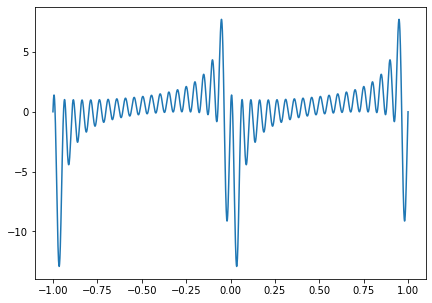

In [29]:
# Plot of the function for reference.
x, y = func(10000)
plt.plot(x, y)
plt.show()

# Q5.

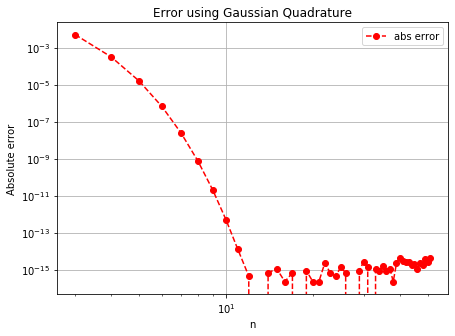

In [9]:
# Define the function
def func_q5(X):
    return np.exp(-np.power(X,2))

# Calculate the Integral using Gauss Quadrature
N = [i for i in range(3, 52)]
I_Gauss = []
for n in N:
    X, W = np.polynomial.legendre.leggauss(n)
    F = func_q5(X)
    I_Gauss.append(sum([W[i]*F[i] for i in range(n)]))

# Obtained from wolfram-alpha.
I_exact = 1.493648265624854050798934872263706010708999373625212658055

# Plot the results
plt.loglog(N, np.abs(np.subtract(I_Gauss,I_exact)),
               marker='o',color='r', label="abs error", linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('n')
plt.ylabel('Absolute error')
plt.title('Error using Gaussian Quadrature')
plt.show()

As we can after n=13 the integral using gaussian quadrature is matching with the exact integral upto machine precision. The oscillation towards the end are correspondingly the points closer to the lowest value representable in the machine or 0.